In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('movies_train.csv')

In [5]:
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [6]:
df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [7]:
df.drop('dir_prev_bfnum', axis=1, inplace=True)

In [8]:
# director(감독명) : 너무 다양해서 제거
df.drop('director', axis=1, inplace=True)

In [9]:
# title(제목) : 의미 없으므로 제거
df.drop('title', axis=1, inplace=True)

In [10]:
df

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,1,251,2,483387
...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091
596,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475
598,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,0,431,4,2192525


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   release_time   600 non-null    object
 3   time           600 non-null    int64 
 4   screening_rat  600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


In [12]:
df['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [13]:
# 상위 5개 배급사 제외하고 '기타'로 처리
distributor_list = df['distributor'].value_counts()[:5]

def func(distributor):
  if distributor in distributor_list:
    return distributor
  else:
    return '기타'

df['distributor'] = df['distributor'].apply(lambda x : func(x))

In [14]:
# 개봉일 '년','월'로 변경
df['년'] = df['release_time'].apply(lambda x : int(x[:4]))
df['월'] = df['release_time'].apply(lambda x : int(x[5:7]))
df.drop('release_time', axis=1, inplace=True)

In [15]:
df

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,기타,코미디,108,15세 관람가,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,2014,8
596,(주)쇼박스,드라마,127,15세 관람가,1,286,6,1716438,2013,3
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,2010,9
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525,2015,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    object
 4   dir_prev_num   600 non-null    int64 
 5   num_staff      600 non-null    int64 
 6   num_actor      600 non-null    int64 
 7   box_off_num    600 non-null    int64 
 8   년              600 non-null    int64 
 9   월              600 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 47.0+ KB


In [30]:
object_col = df.select_dtypes(object).columns.values
object_col

array(['distributor', 'genre', 'screening_rat'], dtype=object)

In [32]:
df1 = pd.get_dummies(data=df, columns=object_col)

In [33]:
df1

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
X = df1.drop('box_off_num', axis=1).values
y = df1['box_off_num'].values

In [72]:
X.shape, y.shape

((600, 28), (600,))

In [36]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train

array([[ 96,   0,  82, ...,   0,   0,   1],
       [ 94,   0, 138, ...,   1,   0,   0],
       [ 76,   0,   3, ...,   0,   1,   0],
       ...,
       [114,   0, 292, ...,   0,   0,   1],
       [107,   3, 367, ...,   1,   0,   0],
       [ 93,   0,  21, ...,   1,   0,   0]])

In [75]:
y_train

array([   19896,      868,     1068,    37122,      257,   603283,
            685,   383582,     4550,  1122225,   731212,  1472147,
             42,      408,   672340,     2595,     8083,    51120,
           1759,      148,    39317,    50308,     3089,     4122,
           4340,    42337,  1507084,      691,      390,    23398,
           1132,   101698,   218898,     1440,     3044,  1649407,
            914,      368,  1892125,     5212,    63517,    36841,
         814570,    50308,  7482180,    13240,    11666,     5808,
            732,  1715370,     7448,  1980050,    13108,  1166025,
          10942,      112,     7721,    27083,      310,    35578,
           2119,     9566,  7166532,      494,     7956,     2673,
         142609,      112,    39577,      916,      482,  1209363,
           4746,     5317,      988,  3117859,  5508299,   467697,
          12486,     2386,  3849696,       71,   283449,    13429,
            893,     5322,     2951,    39916,      831,     1

In [76]:
X_train.shape, y_train.shape

((480, 28), (480,))

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [89]:
lg.score(X_test, y_test)

0.0

In [90]:
lg_pred = lg.predict(X_test)

In [91]:
lg_pred

array([  101698,   387408,       72,     1523,      484,      742,
            419,     4586,   210278,    50308,  2393103,  3019960,
           1240,  1867849,      600,      555,     1240,     4746,
           7908,   654407, 12706663,     4586,   790181,    51207,
           1958,      742,     4746,  3019960,      742,      600,
          80734,     4586,      742,      742,      484,    50308,
        3849696,     9323,      742,   143458,      484,      831,
            831,  1854711,      831,  1422844,  5443049,   603283,
          16096,     1958,      112,      480,    51207,   143458,
           1958,     3199,      742,     4449,  2434435,  2202788,
         472695,      742,   387408,     1958,   101698,      112,
         672340,    51207,  2434435,     1958,      600,     4586,
           1523,      831,  2084844,  1046313,      218,    50308,
         133665,      419,      742,     1958,  3450305,  1177435,
           6085,   283449,     1958,  4515833,      112,   257

In [92]:
y_test

array([1346754,    4486,    6034,   11650, 1214839,     446,     745,
         13538,  210775,    1611,  986287, 2541603,     353, 1612554,
         29478,    1426,   73729,    2418,  167024, 2475797, 6959083,
         12696,  627586, 1716438,     166, 1383867,    8757,  972431,
          3536,   21576, 1475091,     163,  849635,    5992,  316955,
           136,  386074,     820,    3916,     678,   20081,    3460,
         69122,    3060,    1176,   43947, 1131154,  714136, 1310895,
          1217,    8567,    1002, 9135806,    1081,   14188,  356436,
       3350311,     429,  130784,   25391,  402876,     933,   44216,
       2318748,  104736,     488, 5604106,  790370, 1208310,     512,
         21483,   53526,    1617,     279, 3566844,   81008,      81,
          1526,  616481,       1,    3223,     303, 2192525, 1596762,
          1637, 1726227,    1575, 1141222,     366,    1536,    1806,
          1679,  306642, 1027782,  225839,    5648,  155281,    1079,
       1872682,    2

In [93]:
lg.score(X_train, y_train)

0.45625

In [94]:
lg.score(X_test, y_test)

0.0

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(lg_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
          72       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       0.0
          90       0.00      0.00      0.00       0.0
         112       0.00      0.00      0.00       3.0
         136       0.00      0.00      0.00       0.0
         163       0.00      0.00      0.00       0.0
         166       0.00      0.00      0.00       0.0
         172       0.00      0.00      0.00       0.0
         218       0.00      0.00      0.00       1.0
         236       0.00      0.00      0.00       0.0
         279       0.00      0.00      0.00       0.0
         303       0.00      0.00      0.00       0.0
         353       0.00      0.00      0.00       0.0
         366       0.00      0.00      0.00       0.0
         419       0.00      0.00      0.00       3.0
         429       0.00      0.00      0.00       0.0
         446       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [83]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(28,)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 145       
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 174 (696.00 Byte)
Trainable params: 174 (696.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [58]:
cp = ModelCheckpoint(monitor='val_loss', mode='min', filepath='best_model.h5', save_best_only=True, verbose=1)

In [88]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10, callbacks=[es, cp])

Epoch 1/20
45/48 [===========================>..] - ETA: 0s - loss: -85516000.0000 - accuracy: 0.0000e+00
Epoch 1: val_loss did not improve from -231683872.00000
48/48 [==============================] - 1s 6ms/step - loss: -82749000.0000 - accuracy: 0.0000e+00 - val_loss: -80625080.0000 - val_accuracy: 0.0083
Epoch 2/20
31/48 [==================>...........] - ETA: 0s - loss: -103300880.0000 - accuracy: 0.0000e+00
Epoch 2: val_loss did not improve from -231683872.00000
48/48 [==============================] - 0s 3ms/step - loss: -91347408.0000 - accuracy: 0.0000e+00 - val_loss: -87283744.0000 - val_accuracy: 0.0083
Epoch 3/20
28/48 [================>.............] - ETA: 0s - loss: -83973712.0000 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from -231683872.00000
48/48 [==============================] - 0s 3ms/step - loss: -108445224.0000 - accuracy: 0.0000e+00 - val_loss: -94997448.0000 - val_accuracy: 0.0083
Epoch 4/20
27/48 [===============>..............] - ETA: 0s - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/48 [===============>..............] - ETA: 0s - loss: -304214240.0000 - accuracy: 0.0000e+00
Epoch 17: val_loss improved from -262938704.00000 to -284547072.00000, saving model to best_model.h5
48/48 [==============================] - 0s 3ms/step - loss: -297894048.0000 - accuracy: 0.0000e+00 - val_loss: -284547072.0000 - val_accuracy: 0.0083
Epoch 18/20
28/48 [================>.............] - ETA: 0s - loss: -223529904.0000 - accuracy: 0.0000e+00
Epoch 18: val_loss improved from -284547072.00000 to -305236096.00000, saving model to best_model.h5
48/48 [==============================] - 0s 3ms/step - loss: -332635776.0000 - accuracy: 0.0000e+00 - val_loss: -305236096.0000 - val_accuracy: 0.0083
Epoch 19/20
28/48 [================>.............] - ETA: 0s - loss: -366683296.0000 - accuracy: 0.0000e+00
Epoch 19: val_loss improved from -305236096.00000 to -330130624.00000, saving model to best_model.h5
48/48 [==============================] - 0s 4ms/step - loss: -347522848.0000 - accu

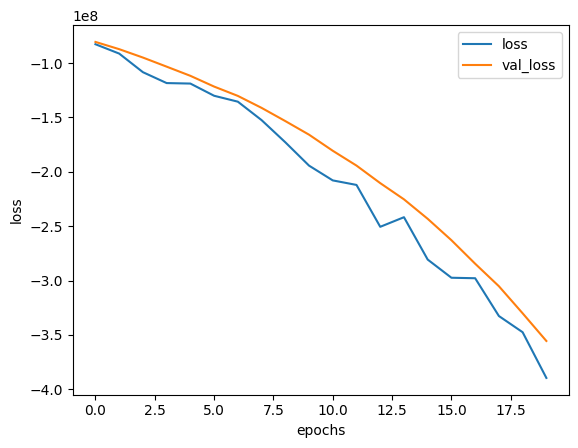

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

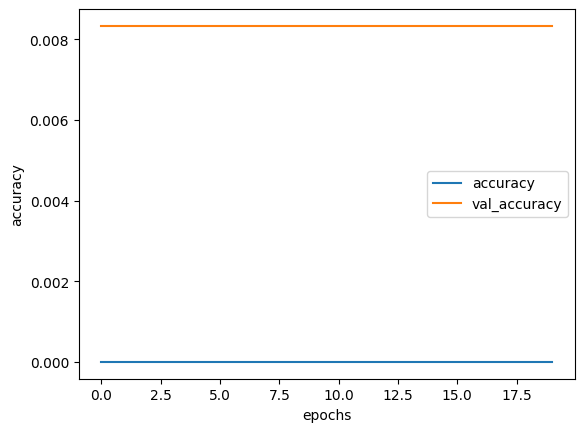

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()